## Problem Statement

### To detect whether a person is having Heart Disease or not

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import seaborn as sns

## Data Gathering

In [2]:
df = pd.read_csv("heart_disease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

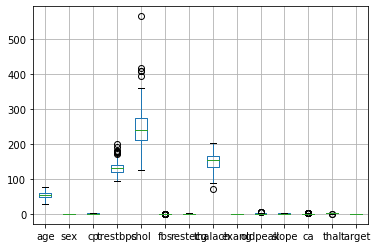

In [6]:
df.boxplot() # we need to work on outliers

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1) AGE

<AxesSubplot:xlabel='age'>

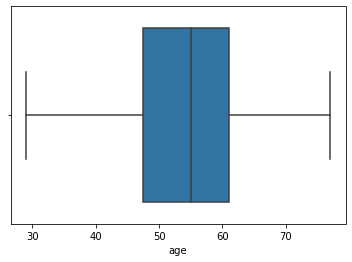

In [8]:
sns.boxplot(df["age"])

### 2) sex

<AxesSubplot:xlabel='sex'>

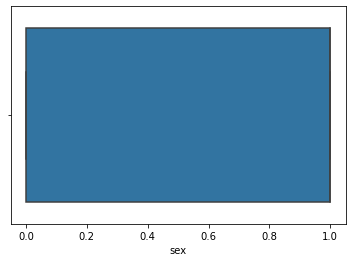

In [9]:
sns.boxplot(df["sex"])

### 3) cp

<AxesSubplot:xlabel='cp'>

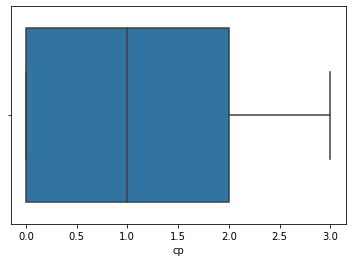

In [10]:
sns.boxplot(df["cp"])

### 4) trestbps

<AxesSubplot:xlabel='trestbps'>

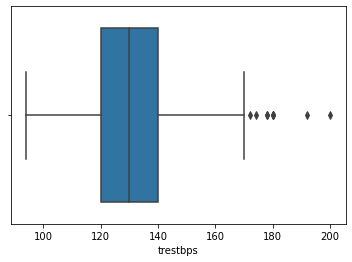

In [11]:
sns.boxplot(df["trestbps"])  # outliers need to be handled

### 5) chol

<AxesSubplot:xlabel='chol'>

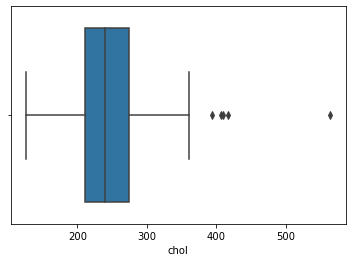

In [12]:
sns.boxplot(df["chol"]) # outliers need to handled

### 6) fbs

<AxesSubplot:xlabel='fbs'>

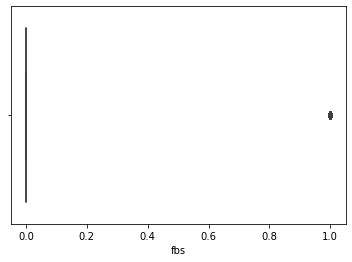

In [13]:
sns.boxplot(df["fbs"])

### 7) restecg

<AxesSubplot:xlabel='restecg'>

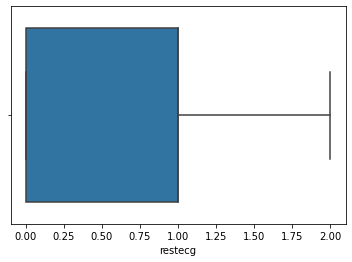

In [14]:
sns.boxplot(df["restecg"])

### 8) thalach

<AxesSubplot:xlabel='thalach'>

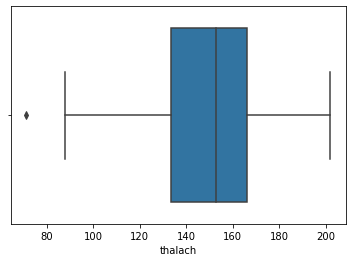

In [15]:
sns.boxplot(df["thalach"])

### 9) exang

<AxesSubplot:xlabel='exang'>

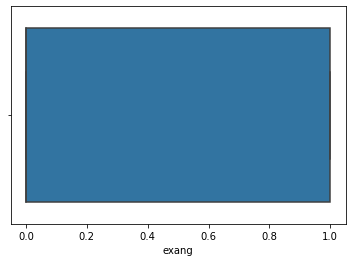

In [16]:
sns.boxplot(df["exang"])

### 10) oldpeak

<AxesSubplot:xlabel='oldpeak'>

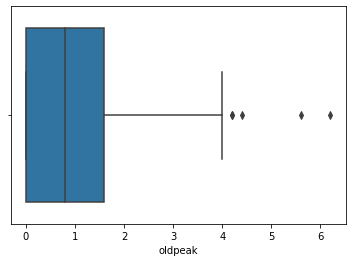

In [17]:
sns.boxplot(df["oldpeak"]) # outliers need to handled

### 11) slope

<AxesSubplot:xlabel='slope'>

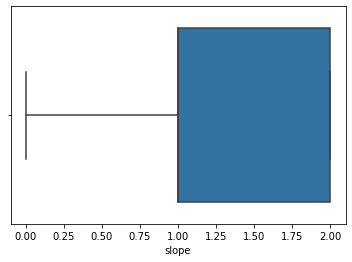

In [18]:
sns.boxplot(df["slope"])

### 12) ca

<AxesSubplot:xlabel='ca'>

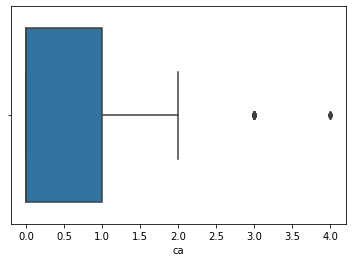

In [19]:
sns.boxplot(df["ca"]) # outliers need to handled

### 13) thal

<AxesSubplot:xlabel='thal'>

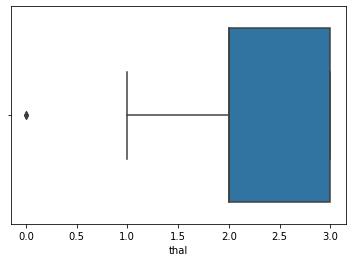

In [20]:
sns.boxplot(df["thal"]) # outliers need to handled

## Feature Engineering

### 4) trestbps

<AxesSubplot:xlabel='trestbps'>

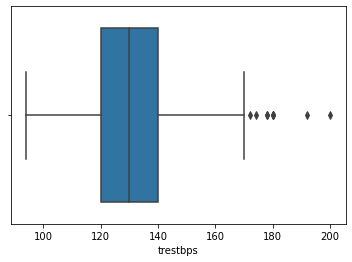

In [21]:
sns.boxplot(df["trestbps"])  # outliers need to be handled

In [22]:
# IQR method

q1 = df["trestbps"].quantile(0.25)
q2 = df["trestbps"].quantile(0.50)
q3 = df["trestbps"].quantile(0.75)

IQR = q3-q1

uppertail = q3 + 1.5*IQR
lowertail = q1 - 1.5*IQR

In [23]:
df.loc[(df["trestbps"]> uppertail) ] # outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [24]:
trestbps_mean=df.loc[(df["trestbps"]>=lowertail) & (df["trestbps"]<=uppertail),"trestbps"].mean()
trestbps_mean

130.0952380952381

In [25]:
df["trestbps"]=np.where(df["trestbps"]>uppertail,trestbps_mean,df["trestbps"])

<AxesSubplot:xlabel='trestbps'>

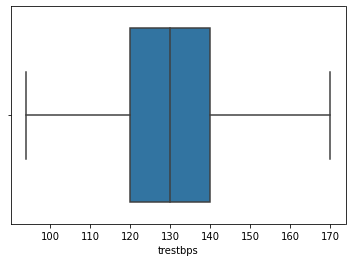

In [26]:
sns.boxplot(df["trestbps"])

### 5) chol

<AxesSubplot:xlabel='chol'>

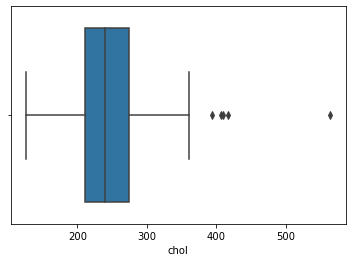

In [27]:
sns.boxplot(df["chol"]) # outliers need to handled

In [28]:
# IQR method

q1 = df["chol"].quantile(0.25)
q2 = df["chol"].quantile(0.50)
q3 = df["chol"].quantile(0.75)

IQR = q3-q1

uppertail = q3 + 1.5*IQR
lowertail = q1 - 1.5*IQR

In [29]:
df["chol"].value_counts()

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

In [30]:
df.loc[df["chol"]>uppertail]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140.0,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115.0,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140.0,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150.0,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134.0,409,0,0,150,1,1.9,1,2,3,0


In [31]:
chol_mean = df.loc[df["chol"]<=uppertail,"chol"].mean()
chol_mean

243.04362416107384

In [32]:
df["chol"]=np.where(df["chol"]>uppertail,chol_mean,df["chol"])

<AxesSubplot:xlabel='chol'>

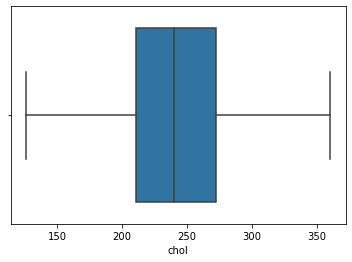

In [33]:
sns.boxplot(df["chol"])

### 10) oldpeak

<AxesSubplot:xlabel='oldpeak'>

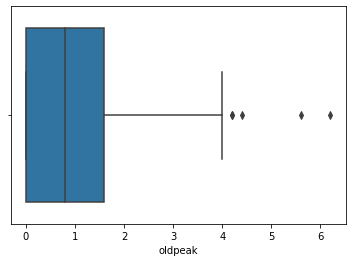

In [34]:
sns.boxplot(df["oldpeak"]) # outliers need to handled

In [35]:
# IQR method

q1 = df["oldpeak"].quantile(0.25)
q2 = df["oldpeak"].quantile(0.50)
q3 = df["oldpeak"].quantile(0.75)

IQR = q3-q1

uppertail = q3 + 1.5*IQR
lowertail = q1 - 1.5*IQR

In [36]:
df.loc[df["oldpeak"]>uppertail]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,130.095238,270.0,0,0,145,0,4.2,0,0,3,1
204,62,0,0,160.000000,164.0,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140.000000,217.0,0,1,111,1,5.6,0,0,3,0
250,51,1,0,140.000000,298.0,0,1,122,1,4.2,1,3,3,0
291,58,1,0,114.000000,318.0,0,2,140,0,4.4,0,3,1,0


In [37]:
oldpeak_mean = df.loc[df["oldpeak"]<=uppertail,"oldpeak"].mean()
oldpeak_mean

0.9744966442953017

In [38]:
df["oldpeak"]=np.where(df["oldpeak"]>uppertail,oldpeak_mean,df["oldpeak"])

<AxesSubplot:xlabel='oldpeak'>

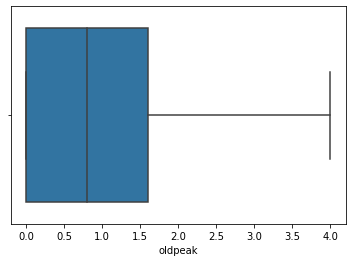

In [39]:
sns.boxplot(df["oldpeak"])

### 12) ca

<AxesSubplot:xlabel='ca'>

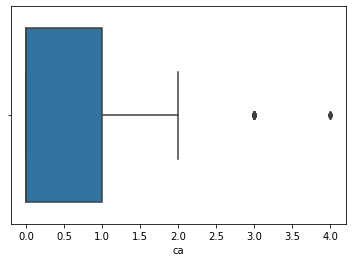

In [40]:
sns.boxplot(df["ca"]) # outliers need to handled

In [41]:
# IQR method

q1 = df["ca"].quantile(0.25)
q2 = df["ca"].quantile(0.50)
q3 = df["ca"].quantile(0.75)

IQR = q3-q1

uppertail = q3 + 1.5*IQR
lowertail = q1 - 1.5*IQR

In [42]:
df.loc[df["ca"]>uppertail]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,62,1,2,130.0,231.000000,0,1,146,0,1.800000,1,3,3,1
92,52,1,2,138.0,223.000000,0,1,169,0,0.000000,2,4,2,1
97,52,1,0,108.0,233.000000,1,1,147,0,0.100000,2,3,3,1
99,53,1,2,130.0,246.000000,1,0,173,0,0.000000,2,3,2,1
158,58,1,1,125.0,220.000000,0,1,144,0,0.400000,1,4,3,1
163,38,1,2,138.0,175.000000,0,1,173,0,0.000000,2,4,2,1
164,38,1,2,138.0,175.000000,0,1,173,0,0.000000,2,4,2,1
165,67,1,0,160.0,286.000000,0,0,108,1,1.500000,1,3,2,0
181,65,0,0,150.0,225.000000,0,0,114,0,1.000000,1,3,3,0
191,58,1,0,128.0,216.000000,0,0,131,1,2.200000,1,3,3,0


In [43]:
ca_mean = df.loc[df["ca"]<=uppertail,"ca"].mean()
ca_mean

0.5071942446043165

In [44]:
df["ca"]=np.where(df["ca"]>uppertail,ca_mean,df["ca"])

<AxesSubplot:xlabel='ca'>

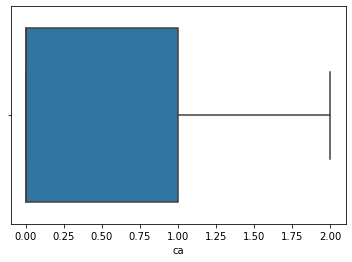

In [45]:
sns.boxplot(df["ca"])

### 13) thal

<AxesSubplot:xlabel='thal'>

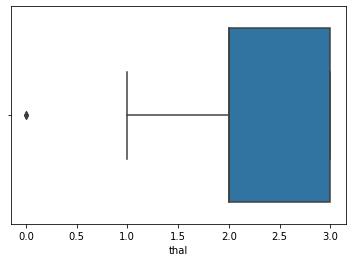

In [46]:
sns.boxplot(df["thal"]) # outliers need to handled

In [47]:
# IQR method

q1 = df["thal"].quantile(0.25)
q2 = df["thal"].quantile(0.50)
q3 = df["thal"].quantile(0.75)

IQR = q3-q1

uppertail = q3 + 1.5*IQR
lowertail = q1 - 1.5*IQR

In [48]:
df.loc[df["thal"]>uppertail]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [49]:
thal_mean = df.loc[(df["thal"]>=lowertail)&(df["thal"]<=uppertail),"thal"].mean()
thal_mean

2.3289036544850497

In [50]:
df["thal"]=np.where(df["thal"]<lowertail,thal_mean,df["thal"])

<AxesSubplot:xlabel='thal'>

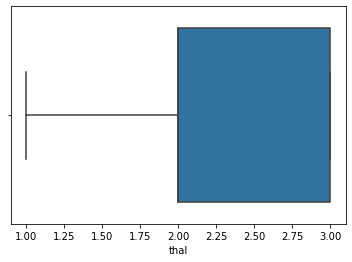

In [51]:
sns.boxplot(df["thal"])

<AxesSubplot:>

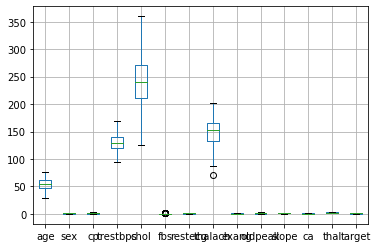

In [52]:
df.boxplot()

In [53]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [54]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

In [55]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

### Train_Test_Split

In [56]:
x=df.drop("target",axis=1)
y=df["target"]

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45,stratify=y)

### Model Evaluation (Logistic regression)

In [58]:
lg_model = LogisticRegression()

In [59]:
lg_model.fit(x_train,y_train)

LogisticRegression()

### training and testing

In [60]:
# training

y_pred_train = lg_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix\n",cnf_matrix)

Accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy",Accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification report\n",clf_report)

Confusion Matrix
 [[ 84  19]
 [  7 117]]
Accuracy 0.8854625550660793
Classification report
               precision    recall  f1-score   support

           0       0.92      0.82      0.87       103
           1       0.86      0.94      0.90       124

    accuracy                           0.89       227
   macro avg       0.89      0.88      0.88       227
weighted avg       0.89      0.89      0.88       227



In [61]:
# testing

y_pred_test = lg_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix\n",cnf_matrix)

Accuracy = accuracy_score(y_test,y_pred_test)
print("Accuracy",Accuracy)

clf_report = classification_report(y_test,y_pred_test)
print("Classification report\n",clf_report)

Confusion Matrix
 [[22 13]
 [ 2 39]]
Accuracy 0.8026315789473685
Classification report
               precision    recall  f1-score   support

           0       0.92      0.63      0.75        35
           1       0.75      0.95      0.84        41

    accuracy                           0.80        76
   macro avg       0.83      0.79      0.79        76
weighted avg       0.83      0.80      0.80        76



## Decision tree Model

In [62]:
# now lets make another model using decision tree

In [63]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [64]:
df = pd.read_csv("heart_disease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='target', ylabel='count'>

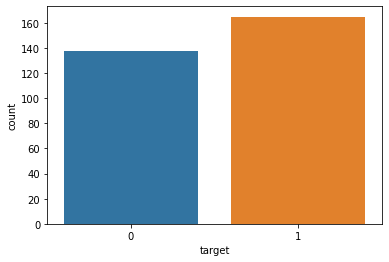

In [65]:
sns.countplot(df["target"])

In [66]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [68]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## train test split

In [69]:
x = df.drop("target",axis=1)
y = df["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=45,stratify=y)

## Model Selection

In [70]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

## Model Evaluation

In [71]:
# Training
y_pred_train  = dt_clf.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion metrics\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy\n",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("classification report\n",clf_report)

confusion metrics
 [[110   0]
 [  0 132]]
accuracy
 1.0
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [72]:
# Testing
y_pred_test  = dt_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("confusion metrics\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy\n",accuracy)

clf_report = classification_report(y_test,y_pred_test)
print("classification report\n",clf_report)

confusion metrics
 [[18 10]
 [ 7 26]]
accuracy
 0.7213114754098361
classification report
               precision    recall  f1-score   support

           0       0.72      0.64      0.68        28
           1       0.72      0.79      0.75        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



### Lets check accuracy with Hyper parameter

In [75]:
dt_model = DecisionTreeClassifier()
hyper_para = {"criterion" :['gini',"entropy"],
              "max_depth":np.arange(2,8),
        "min_samples_split":np.arange(3,20),
        "min_samples_leaf":np.arange(3,15),
             }
gscv_dt_clf = GridSearchCV(dt_model,hyper_para,cv=5)
gscv_dt_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [76]:
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4,
                       min_samples_split=7)

In [77]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4,
                       min_samples_split=7)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4,
                       min_samples_split=7)

## Training and Testing

In [78]:
# Training
y_pred_train  = dt_clf.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion metrics\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy\n",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("classification report\n",clf_report)


confusion metrics
 [[100  10]
 [  9 123]]
accuracy
 0.9214876033057852
classification report
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       110
           1       0.92      0.93      0.93       132

    accuracy                           0.92       242
   macro avg       0.92      0.92      0.92       242
weighted avg       0.92      0.92      0.92       242



In [79]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [80]:
# Testing
y_pred_test  = dt_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("confusion metrics\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy\n",accuracy)

clf_report = classification_report(y_test,y_pred_test)
print("classification report\n",clf_report)

confusion metrics
 [[17 11]
 [ 4 29]]
accuracy
 0.7540983606557377
classification report
               precision    recall  f1-score   support

           0       0.81      0.61      0.69        28
           1       0.72      0.88      0.79        33

    accuracy                           0.75        61
   macro avg       0.77      0.74      0.74        61
weighted avg       0.76      0.75      0.75        61



### Also we will check accyarcy with pre-pruning and post pruning

## Pruning

In [81]:
d_tree_model = DecisionTreeClassifier(random_state=45,ccp_alpha=0.0)
d_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=45)

In [82]:
#training

y_pred_train = d_tree_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy\n",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("classification report\n",clf_report)

confusion matrix
 [[110   0]
 [  0 132]]
accuracy
 1.0
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [83]:
# Testing
y_pred_test  = d_tree_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("confusion metrics\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy\n",accuracy)

clf_report = classification_report(y_test,y_pred_test)
print("classification report\n",clf_report)


confusion metrics
 [[16 12]
 [ 5 28]]
accuracy
 0.7213114754098361
classification report
               precision    recall  f1-score   support

           0       0.76      0.57      0.65        28
           1       0.70      0.85      0.77        33

    accuracy                           0.72        61
   macro avg       0.73      0.71      0.71        61
weighted avg       0.73      0.72      0.71        61



### Post Pruning method

In [84]:
dict_result = d_tree_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas_list = dict_result["ccp_alphas"]
ccp_alphas_list

array([0.        , 0.00385675, 0.00404431, 0.00407056, 0.0050632 ,
       0.00522877, 0.00550964, 0.00661157, 0.00688705, 0.00688705,
       0.0072314 , 0.00768603, 0.00782949, 0.00991736, 0.00991736,
       0.01056015, 0.01114265, 0.01115702, 0.01126972, 0.01398368,
       0.01496458, 0.02568847, 0.0377135 , 0.04855589, 0.1419503 ])

In [85]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha_v in ccp_alphas_list:
    dt_clf_1 = DecisionTreeClassifier(random_state=45,ccp_alpha=ccp_alpha_v)
    dt_clf_1.fit(x_train,y_train)
    
    train_accuracy_list.append(dt_clf_1.score(x_train,y_train))
    test_accuracy_list.append(dt_clf_1.score(x_test,y_test))
train_accuracy_list

[1.0,
 0.9958677685950413,
 0.9917355371900827,
 0.987603305785124,
 0.9793388429752066,
 0.9710743801652892,
 0.9628099173553719,
 0.9586776859504132,
 0.9504132231404959,
 0.9504132231404959,
 0.9462809917355371,
 0.9380165289256198,
 0.9338842975206612,
 0.9256198347107438,
 0.9132231404958677,
 0.8884297520661157,
 0.8884297520661157,
 0.8842975206611571,
 0.8636363636363636,
 0.859504132231405,
 0.8347107438016529,
 0.8347107438016529,
 0.7768595041322314,
 0.768595041322314,
 0.5454545454545454]

In [86]:
test_accuracy_list

[0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7377049180327869,
 0.7213114754098361,
 0.5409836065573771]

In [87]:
np.where(test_accuracy_list == np.max(test_accuracy_list))

(array([19, 20, 21], dtype=int64),)

In [88]:
test_accuracy_list[19]

0.7868852459016393

In [89]:
test_accuracy_list[20]

0.7868852459016393

In [90]:
test_accuracy_list[21]

0.7868852459016393

### Lets check results with Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

### Train Test Split

In [92]:
x = df.drop("target",axis=1) 
y = df["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

### Model Training

In [93]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [94]:
#Training 
y_pred_train = rf_model.predict(x_train)

cnf_metrics = confusion_matrix(y_train,y_pred_train)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("clf_report\n",clf_report)

confusion metrics
 [[110   0]
 [  0 132]]
accuracy 1.0
clf_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [95]:
#Testing
y_pred_test = rf_model.predict(x_test)

cnf_metrics = confusion_matrix(y_test,y_pred_test)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy",accuracy)
clf_report = classification_report(y_test,y_pred_test)
print("clf_report\n",clf_report)

confusion metrics
 [[19  9]
 [ 2 31]]
accuracy 0.819672131147541
clf_report
               precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



## HyperParamter Tuning

In [96]:
rf_model = RandomForestClassifier()
hyperparamter = {"n_estimators":np.arange(10,20),
                "criterion":["gini","entropy"],
                "max_depth" :np.arange(4,10),
                "min_samples_split":np.arange(3,10),
                "min_samples_leaf":np.arange(3,10),
                "max_features":["sqrt", "log2"],
                "random_state":[41,42,43,44,45],
                "oob_score":[True]}
rdscv = RandomizedSearchCV(rf_model,hyperparamter,cv=4)
rdscv.fit(x_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([4, 5, 6, 7, 8, 9]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'oob_score': [True],
                                        'random_state': [41, 42, 43, 44, 45]})

In [97]:
rf_model = rdscv.best_estimator_

In [98]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=6, min_samples_split=5,
                       n_estimators=14, oob_score=True, random_state=44)

In [99]:
#Training 
y_pred_train = rf_model.predict(x_train)

cnf_metrics = confusion_matrix(y_train,y_pred_train)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("clf_report\n",clf_report)

confusion metrics
 [[ 92  18]
 [ 10 122]]
accuracy 0.8842975206611571
clf_report
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       110
           1       0.87      0.92      0.90       132

    accuracy                           0.88       242
   macro avg       0.89      0.88      0.88       242
weighted avg       0.89      0.88      0.88       242



In [100]:
#Testing
y_pred_test = rf_model.predict(x_test)

cnf_metrics = confusion_matrix(y_test,y_pred_test)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy",accuracy)
clf_report = classification_report(y_test,y_pred_test)
print("clf_report\n",clf_report)

confusion metrics
 [[19  9]
 [ 1 32]]
accuracy 0.8360655737704918
clf_report
               precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



## SVM

In [101]:
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Train Test Split

In [103]:
x = df.drop("target",axis=1) 
y = df["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

### Model Training

In [104]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

### Training and Testing

In [105]:
#training

y_pred_train = svc_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix\n",cnf_matrix)

Accuracy = accuracy_score(y_train,y_pred_train)
print("ACCURACY",Accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report\n",clf_report)

Confusion Matrix
 [[ 51  59]
 [ 25 107]]
ACCURACY 0.6528925619834711
Classification Report
               precision    recall  f1-score   support

           0       0.67      0.46      0.55       110
           1       0.64      0.81      0.72       132

    accuracy                           0.65       242
   macro avg       0.66      0.64      0.63       242
weighted avg       0.66      0.65      0.64       242



In [106]:
#testing

y_pred_test = svc_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix\n",cnf_matrix)

Accuracy = accuracy_score(y_test,y_pred_test)
print("ACCURACY",Accuracy)

clf_report = classification_report(y_test,y_pred_test)
print("Classification Report\n",clf_report)

Confusion Matrix
 [[14 14]
 [ 7 26]]
ACCURACY 0.6557377049180327
Classification Report
               precision    recall  f1-score   support

           0       0.67      0.50      0.57        28
           1       0.65      0.79      0.71        33

    accuracy                           0.66        61
   macro avg       0.66      0.64      0.64        61
weighted avg       0.66      0.66      0.65        61



### Lets check result with scaling

In [126]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [127]:
x_df = df.drop("target",axis=1)
y = df["target"]

In [128]:
normal = MinMaxScaler()
array = normal.fit_transform(x_df)
x_normal_df = pd.DataFrame(array,columns=x_df.columns)
x_normal_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [129]:
x = x_normal_df.copy()
y = df["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45,stratify=y)

### Model Training

In [130]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

### Training and Testing

In [131]:
#training

y_pred_train = svc_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix\n",cnf_matrix)

Accuracy = accuracy_score(y_train,y_pred_train)
print("ACCURACY",Accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report\n",clf_report)

Confusion Matrix
 [[ 86  17]
 [  7 117]]
ACCURACY 0.8942731277533039
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.83      0.88       103
           1       0.87      0.94      0.91       124

    accuracy                           0.89       227
   macro avg       0.90      0.89      0.89       227
weighted avg       0.90      0.89      0.89       227



In [132]:
#testing

y_pred_test = svc_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix\n",cnf_matrix)

Accuracy = accuracy_score(y_test,y_pred_test)
print("ACCURACY",Accuracy)

clf_report = classification_report(y_test,y_pred_test)
print("Classification Report\n",clf_report)

Confusion Matrix
 [[22 13]
 [ 4 37]]
ACCURACY 0.7763157894736842
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.63      0.72        35
           1       0.74      0.90      0.81        41

    accuracy                           0.78        76
   macro avg       0.79      0.77      0.77        76
weighted avg       0.79      0.78      0.77        76



### SVM with Hyperparameter

In [146]:
svc_model = SVC()

In [147]:
hyperparameter = {"kernel":["linear","poly","sigmoid","rbf"],
                 "C":np.arange(1,100)}
rscv = RandomizedSearchCV(svc_model,hyperparameter,cv=5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'kernel': ['linear', 'poly', 'sigmoid',
                                                   'rbf']})

In [148]:
rscv.best_estimator_

SVC(C=76, kernel='linear')

In [149]:
svc_model_1 = SVC(C=76, kernel='linear')
svc_model_1.fit(x_train,y_train)

SVC(C=76, kernel='linear')

### Training and Testing

In [150]:
#Training Data
y_pred_train = svc_model_1.predict(x_train)
cnf_metrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix\n",cnf_metrix)
accuracy = accuracy_score(y_train,y_pred_train)
print("accuarcy",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("classification report",clf_report)

confusion matrix
 [[ 80  23]
 [ 10 114]]
accuarcy 0.8546255506607929
classification report               precision    recall  f1-score   support

           0       0.89      0.78      0.83       103
           1       0.83      0.92      0.87       124

    accuracy                           0.85       227
   macro avg       0.86      0.85      0.85       227
weighted avg       0.86      0.85      0.85       227



In [151]:
#Testing 
y_pred = svc_model_1.predict(x_test)
cnf_metrix = confusion_matrix(y_test,y_pred)
print("confusion matrix\n",cnf_metrix)
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy",accuracy)
clf_report = classification_report(y_test,y_pred)
print("classification report",clf_report)

confusion matrix
 [[20 15]
 [ 2 39]]
accuarcy 0.7763157894736842
classification report               precision    recall  f1-score   support

           0       0.91      0.57      0.70        35
           1       0.72      0.95      0.82        41

    accuracy                           0.78        76
   macro avg       0.82      0.76      0.76        76
weighted avg       0.81      0.78      0.77        76



### Lets see the accuracy we've got by the models

In [152]:
df1 = pd.DataFrame({"MODEL":["Logistic Regression","Decision tree","Decision tree with Hyperparameter","Pruning","Post Pruning",
                            "Random Forest","Random Forest with Hyperparameter","SVM","SVM with Scaling","SVM with Hyperparameter"],
                   "Training Accuracy(%)":[88.5,100,92.1,100,85.9,100,88.4,65.2,89.4,85.4],
                   "Testing Accuracy(%)":[80.2,72.1,75.4,72.1,78.6,81.9,83.6,65.5,77.6,77.6]})
df1

,MODEL,Training Accuracy(%),Testing Accuracy(%)
0,Logistic Regression,88.5,80.2
1,Decision tree,100.0,72.1
2,Decision tree with Hyperparameter,92.1,75.4
3,Pruning,100.0,72.1
4,Post Pruning,85.9,78.6
5,Random Forest,100.0,81.9
6,Random Forest with Hyperparameter,88.4,83.6
7,SVM,65.2,65.5
8,SVM with Scaling,89.4,77.6
9,SVM with Hyperparameter,85.4,77.6


In [ ]:
Here we got the best accuracy by SVM with Hyperparameter >>svc_model_1
Training = 85.9%
Testing = 83.6%

## User Input Function

In [159]:
#User input function

input_data = (44,0,2,118,242,0,1,149,0,0.3,1,1,2)

# change input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the numpy array
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = lg_model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print("Person is not having Heart Disease")
else:
    print("Person is having Heart Disease")

[1]
Person is having Heart Disease
